![Title](Images/cisco.png)

# Lab - Correlation Analysis in Python

### Objectives

</br>


*   Part 1: The Dataset
*   Part 2: Scatterplot Graphs and Correlatable Variables
* Part 3: Calculating Correlation with Python
* Part 4: Visualizing






</br>

### Scenario/Background

Correlation is an important statistical relationship that can indicate whether the variable values are linearly related.

In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset. In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part 3, you will use Python to calculate the correlation between two sets of variable.

### Required Resources
* 1 PC with Internet access
* Raspberry Pi version 2 or higher
* Python libraries: pandas, numpy, matplotlib, seaborn
* Datafiles: brainsize.txt

## Part 1: The Dataset

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects. Information about gender and body size (height and weight) are also included. The researchers withheld the weights of two subjects and the height of one subject for reasons of confidentiality.
Two simple modifications were applied to the dataset:

1. Replace the quesion marks used to represent the withheld data points described above by the 'NaN' string. The substitution was done because Pandas does not handle the question marks correctly.

2. Replace all tab characters with commas, converting the dataset into a CSV dataset.

The prepared dataset is saved as `brainsize.txt`.

#### Step 1: Loading the Dataset From a File.

Before the dataset can be used, it must be loaded onto memory.

In the code below, The first line imports the `pandas` modules and defines `pd` as a descriptor that refers to the module.

The second line loads the dataset CSV file into a variable called `brainFile`.

The third line uses `read_csv()`, a `pandas` method, to convert the CSV dataset stored in `brainFile` into a dataframe. The dataframe is then stored in the `brainFrame` variable.

Run the cell below to execute the described functions.

In [ ]:
# Code cell 1
import pandas as pd
brainFile = '/content/brainsize.txt'
brainFrame = pd.read_csv(brainFile, sep = "\t")

#### Step 2: Verifying the dataframe.

To make sure the dataframe has been correctly loaded and created, use the `head()` method. Another Pandas method, `head()` displays the first five entries of a dataframe.

In [ ]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Part 2: Scatterplot Graphs and Correlatable Variables

#### Step 1: The pandas `describe()` method.
The pandas module includes the `describe()` method which performs same common calculations against a given dataset. In addition to provide common results including count, mean, standard deviation, minimum, and maximum,  `describe()` is also a great way to quickly test the validity of the values in the dataframe.<p>
Run the cell below to output the results computed by `describe()` against the `brainFrame` dataframe.

In [ ]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visual verification of the nature of the relationship between the variables. This lab uses the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables. Other more robust correlation methods exist but are out of the scope of this lab.

##### a. Load the required modules.
Before graphs can be plotted, it is necessary to import a few modules, namely `numpy` and `matplotlib`. Run the cell below to load these modules.

In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

##### b. Separate the data.
To ensure the results do not get skewed because of the differences in male and female bodies, the dateframe is split into two dataframes: one containing all male entries and another with only female instances. <p>
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the respective entries.

In [ ]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

##### c. Plot the graphs.
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line below uses Pandas `mean()` method to calculate the mean value between the three and store the result in the `menMeanSmarts` variable. Notice that the first line also refers to the menDf, the filtered dataframe containing only male entries.<p>
The second line uses the `matplotlib` method `scatter()` to create a scatterplot graph between the `menMeanSmarts` variable and the `MRI_Count`attribute. The MRI_Count in this dataset can be thought as of a measure of the physical size of the subjects' brains.<p>
The third line simply displays the graph.<p>
The fourth line is used to ensure the graph will be displayed in this notebook.

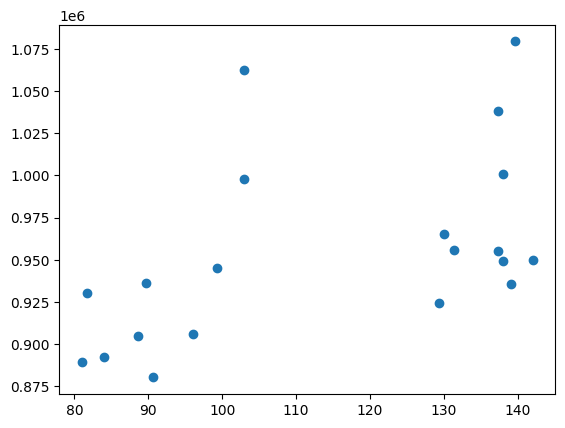

In [ ]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

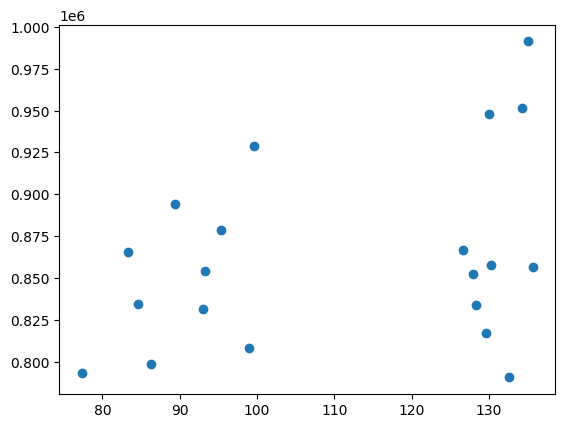

In [ ]:
# Code cell 7
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)   #get the  IQs data of women
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])               #Plotting of data
plt.show()
%matplotlib inline

## Part 3: Calculating Correlation with Python


#### Step 1: Calculate correlation against brainFrame.
The pandas `corr()` method provides an easy way to calculate correlation against a dataframe. By simply calling the method against a dataframe, one can get the correlation between all variables at the same time.

In [ ]:
# Code cell 8
brainFrame.corr(method='pearson')

<ipython-input-11-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled with 1s? Is that a coincidence? Explain.

- It is not a coincidence. As shown in the table, the correlation between the x vs y axis are being partnered or correlated. This means that if FSIQ of x axis is correlated to FSIQ y-axis it will result to 1 or very strongly correlated since these two has identical values.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

 * It is still not a coincidence because if the value of X and Y are correlated, then Y and X correlation will still be the same. Thus, it mirrored or it became symmetrical because of this logic


Using the same `corr()` method, it is easy to calculate the correlation of the variables contained in the female-only dataframe:

In [ ]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-12-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
# Code cell 10
menDf.corr(method='pearson') #simply called the data frame of men and used corr()

<ipython-input-13-8dae12458314>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson') #simply called the data frame of men and used corr()


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Part 4: Visualizing

#### Step 1: Install Seaborn.
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored squares, heatmap graphs can help identify correlations in a glance.

The Python module named `seaborn` makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the `seaborn` module.

In [ ]:
# Code cell 11
!pip install seaborn

#### Step 2: Plot the correlation heatmap.

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the cell below:

Line 1: Generates a correlation table based on the `womenNoGenderDf` dataframe and stores it on `wcorr`.<br>
Line 2: Uses the `seaborn` `heatmap()` method to generate and plot the heatmap. Notice that `heatmap()` takes `wcorr` as a parameter.<br>
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it has the comment `#` character preceding it, forcing the interpreter to ignore it), it was kept for informational purposes.

<ipython-input-18-5ab3df73add4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


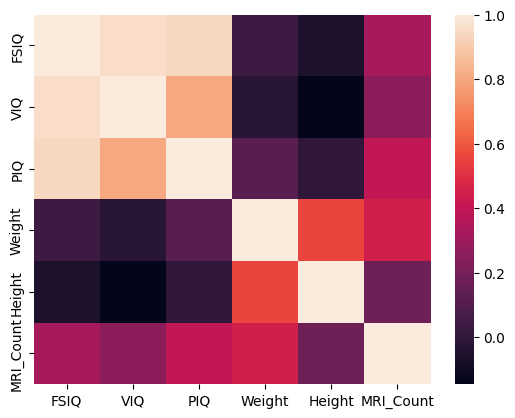

In [ ]:
# Code cell 12
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)

plt.savefig('attribute_correlations.png')

#the Line above shows that the heatmap will be saved as a png file.

This is the proof of the successful savefig() that was called. A new data png file was created containing the heatmap of women data frame correlation


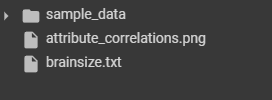

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-19-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

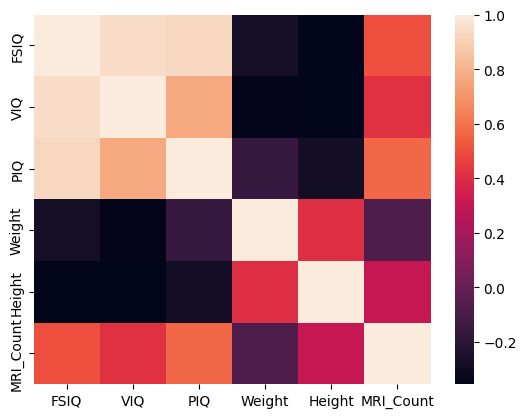

In [ ]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?

- it simply means that they have a weak connection or don't have a connection at all(correlation). X axis does not have a connection on Y axis making it unaffected if one value changes to another.



Why separate the genders?

We seperated the data for gender inorder to ensure that their body composition will not affect the analysis. With that we can reduce the error since the weight and height (body composition) of men and women differs.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

- The variables that have a strong correlation regardless of the gender with brain size are the height and weight. If the data data set was split into two data frame and will only base on their IQs. The PIQ of both genders has a weak positive correlation.

- It is expected. As shown in the correlation regardless of gender shows that the height and weight has a strong correlation on the brain size. This can simply mean that the body composition of an individual influences their brain Size.


<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>

# Supplementary Activity

## Students' Employability Dataset - Philippines </br>
*This data set was uploaded by Anas Hamoutni that was updated a year ago.*

</br>

**About the data:**

A data set consisting of mock job interview results of 2,982 observations from different university agency in the Philippines.


</br>

The goal of this activity is to check the correlation of each aspects to their employability:

- General Appearance  
- Manner Of Speaking  
- Physical Condition  
- Mental Alertness  
- Self-Confidence
- Ability To Present Ideas  
- Communication Skills
- Student Performance Rating



</br>

*source of data set: https://www.kaggle.com/datasets/anashamoutni/students-employability-dataset*

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the csv file

csv_path = "/content/Student-Employability-Datasets.csv"
student_df=  pd.read_csv(csv_path)

In [ ]:
#checking the headers

student_df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [ ]:
#Renaming Employable and LessEmployable to 1 or 0
student_df['CLASS']= student_df['CLASS'].map({'LessEmployable':0,'Employable':1})
student_df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1
1,Student 2,4,4,4,4,4,4,3,5,1
2,Student 3,4,3,3,3,3,3,2,5,0
3,Student 4,3,3,3,2,3,3,3,5,0
4,Student 5,4,4,3,3,4,4,3,5,1


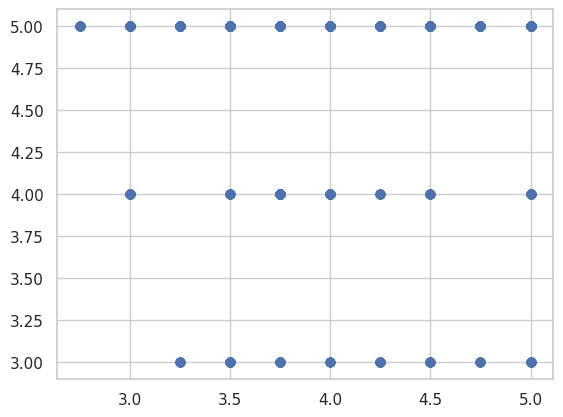

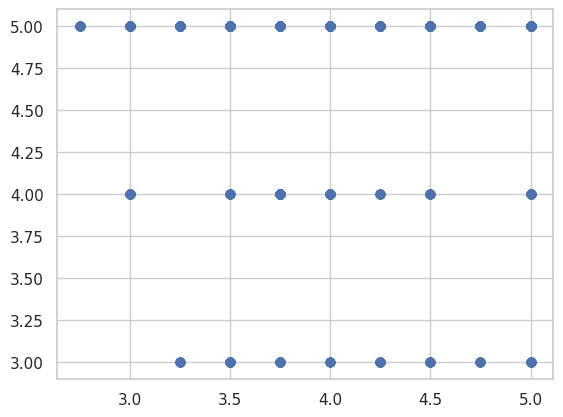

In [ ]:
#Checking the personal attributes on the employability(CLASS)
personal_df = student_df[["GENERAL APPEARANCE", "PHYSICAL CONDITION", "MENTAL ALERTNESS","SELF-CONFIDENCE"]].mean(axis=1)
plt.scatter(personal_df, student_df["Student Performance Rating"])
plt.show()

#Checking the communication and presentation attributes  on the employability(CLASS)

present_df = student_df[["MANNER OF SPEAKING", "ABILITY TO PRESENT IDEAS", "MENTAL ALERTNESS","COMMUNICATION SKILLS"]].mean(axis=1)
plt.scatter(personal_df, student_df["Student Performance Rating"])
plt.show()

In [ ]:
#Checking the correlations:

student_df.corr()

<ipython-input-96-9344273e91cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_df.corr()


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
GENERAL APPEARANCE,1.000000,0.406823,0.468731,0.495937,0.480360,0.406541,0.371028,-0.087379,0.116432
MANNER OF SPEAKING,0.406823,1.000000,0.551092,0.617226,0.549424,0.726366,0.622969,0.072317,0.197887
PHYSICAL CONDITION,0.468731,0.551092,1.000000,0.634661,0.663473,0.570402,0.513667,0.041437,0.164483
MENTAL ALERTNESS,0.495937,0.617226,0.634661,1.000000,0.675185,0.662191,0.630505,0.073547,0.202781
SELF-CONFIDENCE,0.480360,0.549424,0.663473,0.675185,1.000000,0.587900,0.577251,-0.068683,0.141549
ABILITY TO PRESENT IDEAS,0.406541,0.726366,0.570402,0.662191,0.587900,1.000000,0.647501,0.192467,0.117447
COMMUNICATION SKILLS,0.371028,0.622969,0.513667,0.630505,0.577251,0.647501,1.000000,0.048223,0.132850
Student Performance Rating,-0.087379,0.072317,0.041437,0.073547,-0.068683,0.192467,0.048223,1.000000,-0.000822
CLASS,0.116432,0.197887,0.164483,0.202781,0.141549,0.117447,0.132850,-0.000822,1.000000


<ipython-input-100-32a3eb9fd2a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(student_df.corr(),annot=True,fmt=".2f")


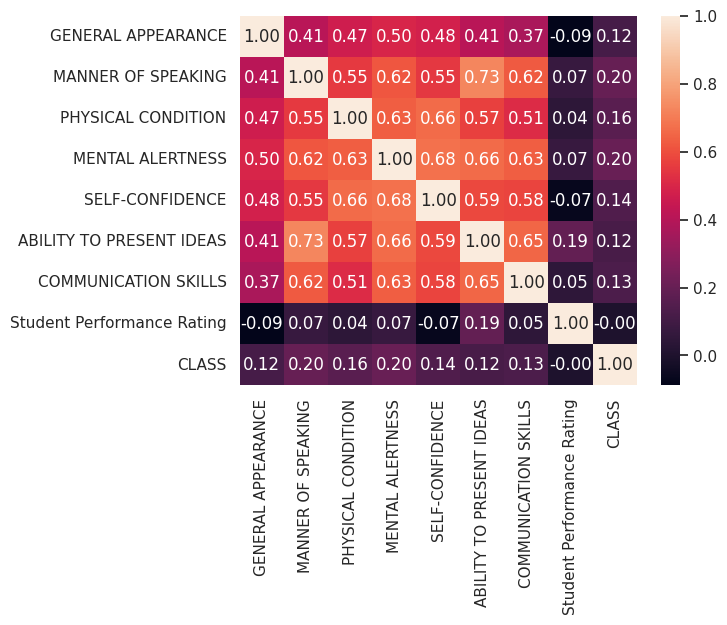

In [ ]:
#Creating a Visual Map

sns.heatmap(student_df.corr(),annot=True,fmt=".2f")
plt.show()

### Conclusions:

After perfoming the analysis from the students employabilty data from the Philippines, I was able to conclude the following things.

1. The data shows that the different aspects from the 2, 982 observations has a low correlation to their empolayabilty.
2. The subjective observations from different university agency in the Philippines might differ that affected the data.
3. A normalization and further cleaning of data is a must in order to extract more information from the data set.

This activity tought me a lot of things about analyzing data. I was able to perform correlation to check the relation ship of my data. I realized that I have a lot of thinks that I have to learn in order to scrape more information on a data set.